In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Data
from tensorflow.keras.datasets import fashion_mnist

(x_train_set, y_train_set), (x_test, y_test) = fashion_mnist.load_data()

In [12]:
x_train_set.shape, y_train_set.shape, x_test.shape, y_test. shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

9


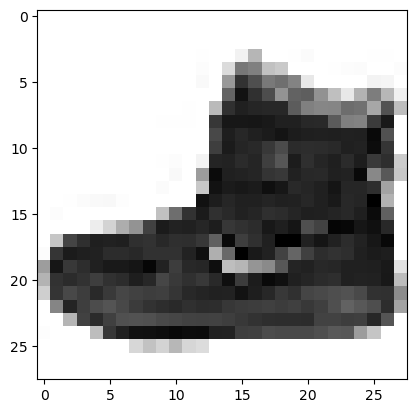

In [13]:
i = 0
print(y_train_set [i])
plt.imshow(x_train_set[i], cmap='binary')
plt.show()

In [14]:
# Split data
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train_set,
                                                      y_train_set,
                                                      random_state=1)

In [15]:
print(x_train[0])
x_train2 = x_train / 255.0
print(x_train2[0])

[[  0   0   0   0   0   0   1   0   0   0   0  63   0   0   0   0   0  22
   10   0   0   0   3   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0 113 226 247 216 185 147 146 207 235
  210 136  15   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 138 221 234 222 218 243 255 255 255 255 223
  218 235 223 172   0   0   4   0   0   0]
 [  0   0   0   2   0   0 205 239 215 212 214 206 213 216 220 220 216 213
  218 214 212 239 213   0   0   0   0   0]
 [  0   0   0   0   0 163 236 208 215 216 217 215 215 215 209 212 215 215
  215 219 218 206 234 100   0   0   0   0]
 [  0   0   0   0  47 234 215 215 215 215 214 214 215 214 215 216 216 215
  215 215 217 215 223 232   0   0   0   0]
 [  0   0   0   0 189 231 222 214 214 215 215 215 215 215 214 215 216 216
  216 218 217 218 219 238  78   0   0   0]
 [  0   0   0   0 217 216 229 225 215 216 214 215 215 214 214 215 215 216
  217 218 217 221 225 230 194   0   0   0]
 [  0   0   0 130 235 209 225 233 211 214 216 216 217 216 214 21

In [16]:
# Preprocessing
x_train = x_train / 255.0
x_valid =x_valid / 255.0
x_test = x_test / 255.0
print(x_train.shape, x_valid.shape, x_test.shape)

(45000, 28, 28) (15000, 28, 28) (10000, 28, 28)


In [17]:
# Build Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [18]:
model = Sequential([
    #第一層：將 28*28攤平成一維度
    Flatten(input_shape=x_train.shape[1:]),
    #隱藏層(密集層)
    Dense (units=300, activation='relu'),
    Dense (units=200, activation='relu'),
    Dense (units=100, activation='relu'),
    #輸出層：10類別，10個神經元
    Dense (units=10, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 200)               60200     
                                                                 
 dense_6 (Dense)             (None, 100)               20100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 316810 (1.21 MB)
Trainable params: 316810 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Compile
model. compile(loss='sparse_categorical_crossentropy',
               optimizer='sgd',
               metrics= ['accuracy'])

In [21]:
# Train
train = model.fit(x_train, y_train,
                   epochs=20,
                  validation_data=(x_valid, y_valid))

Epoch 1/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.7683 - accuracy: 0.7441 - val_loss: 1.1255 - val_accuracy: 0.6933
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4980 - accuracy: 0.8263 - val_loss: 0.6725 - val_accuracy: 0.7785
Epoch 3/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4486 - accuracy: 0.8421 - val_loss: 0.4740 - val_accuracy: 0.8329
Epoch 4/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4167 - accuracy: 0.8532 - val_loss: 0.4412 - val_accuracy: 0.8438
Epoch 5/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3972 - accuracy: 0.8598 - val_loss: 0.4091 - val_accuracy: 0.8522
Epoch 6/20
1407/1407 [==============================] - 4s 2ms/step - loss: 0.3793 - accuracy: 0.8667 - val_loss: 0.3795 - val_accuracy: 0.8656
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3639 - accuracy: 0.8717 - val_loss: 0.4298 - val_accuracy:

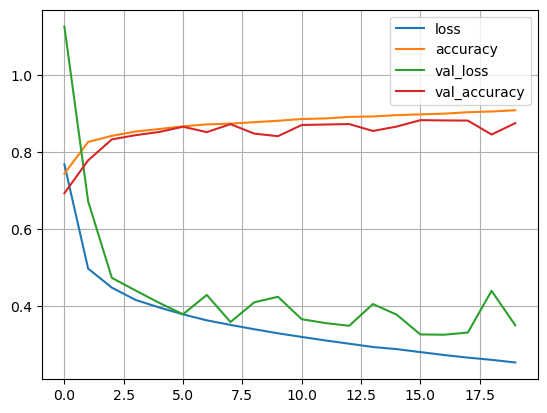

In [22]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt. show()

In [23]:
# Evaluate
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3819 - accuracy: 0.8626


[0.3818865418434143, 0.8626000285148621]

In [24]:
# Predict
y_proba = model.predict(x_test)
y_proba[:3].round (2)

313/313 [==============================] - 0s 1ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
y_pred = np.argmax(y_proba, axis=1)
y_pred[:3]# 預測結果

array([9, 2, 1], dtype=int64)

In [26]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [27]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[906   1  26  34   0   1  21   0  11   0]
 [  4 966   3  23   2   0   2   0   0   0]
 [ 22   1 894  13  34   1  34   0   1   0]
 [ 29  11  19 908  18   0   8   0   7   0]
 [  4   0 259  52 622   0  60   0   3   0]
 [  1   0   0   1   0 966   0  18   2  12]
 [252   2 141  36  44   0 516   0   9   0]
 [  0   0   0   0   0  28   0 933   0  39]
 [ 11   0   6   9   1   5   3   3 962   0]
 [  1   0   0   0   0  13   0  33   0 953]]
